In [87]:
# 导入必要的包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [88]:
# 获取训练集数据
train = pd.read_csv("./data/train.csv")

train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
# 确定特征值和目标值
train_image = train.iloc[:, 1:]

train_image.shape

(42000, 784)

In [90]:
train_label = train.iloc[:, 0]

train_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

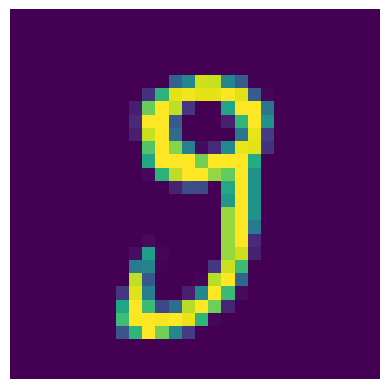

In [91]:
# 查看具体图像

# 这里定义一个显示具体图像的函数
def to_plot(n):
    num = train_image.iloc[n, :].values.reshape(28,28)
    # 显示重塑后的28x28数组作为图像
    plt.imshow(num)
    # 关闭坐标轴的显示，使图像更清晰，专注于图像本身
    plt.axis("off")
    plt.show()


to_plot(40)

In [92]:
# 进行数据基本处理

# 数据归一化处理
# .values --> 将选择的行转换为 NumPy 数组格式。
train_image = train_image.values /255

print(train_image.shape)

train_label = train_label.values


# 数据集分割
x_train, x_val, y_train, y_val = train_test_split(train_image,train_label,train_size=0.8,random_state=55)

x_train

(42000, 784)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [93]:
# 特征降维和模型训练
import time
# decomposition：是 sklearn 库中的一个模块，包含各种降维算法，包括主成分分析（PCA）。
# PCA：是一个类，用于执行主成分分析，主要用于降维、数据压缩和特征提取。
# 它通过线性变换将数据投影到低维空间，保留尽可能多的方差信息。
from sklearn.decomposition import PCA

# 多次使用PCA，确定最后的最优模型
def n_components_analysis(n, x_train, y_train, x_val, y_val):
    # 记录开始时间
    start = time.time()

    # pca降维实现
    pca = PCA(n_components = n)
    print(f"特征降维，传递的参数为：{n}")
    pca.fit(x_train)

    # 在训练集和测试集进行降维
    x_train_pca = pca.transform(x_train)
    x_val_pca = pca.transform(x_val)

    # 利用svm进行训练
    print("******开始使用SVM进行训练******")
    # 创建 SVM 分类器，并使用降维后的训练集进行训练
    ss = svm.SVC()
    ss.fit(x_train_pca,y_train)

    # 获取accuracy结果
    accuracy = ss.score(x_val_pca,y_val)

    # 记录结束时间
    end = time.time()
    print(f"准确率是：{accuracy}, 消耗的时间为：{int(end - start)}s")

    return accuracy



In [94]:

# 传递多个n_components, 寻找合理的值：
# linspace 生成指定范围内的等间隔数值的数组
n_components = np.linspace(0.70, 0.85, num=5)
accuracy = []

for n in n_components:
    tmp = n_components_analysis(n,x_train,y_train,x_val,y_val)
    accuracy.append(tmp)


特征降维，传递的参数为：0.7
******开始使用SVM进行训练******
准确率是：0.976547619047619, 消耗的时间为：11s
特征降维，传递的参数为：0.7374999999999999
******开始使用SVM进行训练******
准确率是：0.9791666666666666, 消耗的时间为：13s
特征降维，传递的参数为：0.7749999999999999
******开始使用SVM进行训练******
准确率是：0.9794047619047619, 消耗的时间为：12s
特征降维，传递的参数为：0.8125
******开始使用SVM进行训练******
准确率是：0.9798809523809524, 消耗的时间为：15s
特征降维，传递的参数为：0.85
******开始使用SVM进行训练******
准确率是：0.9805952380952381, 消耗的时间为：15s


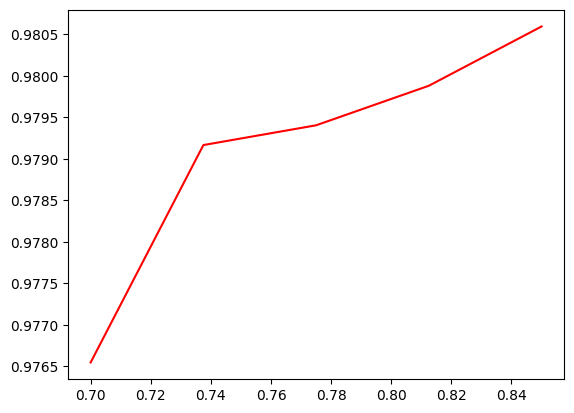

In [95]:
# 准确率可视化展示
plt.plot(n_components, np.array(accuracy), "r")
plt.show()

这里我们选择0.80作为参数

### 确定模型最优模型

In [98]:
pca = PCA(n_components=0.80)

pca.fit(x_train)
# 通过 pca.n_components_ 可以获取实际选取的主成分的数量。
# 这个属性在模型拟合后自动更新，显示为在保留 80% 方差的情况下所选的主成分数。
pca.n_components_

43

In [101]:
x_train.shape, x_val.shape

((33600, 784), (8400, 784))

In [102]:
x_train_pca = pca.transform(x_train)
x_val_pca = pca.transform(x_val)

x_train_pca.shape, x_val_pca.shape

((33600, 43), (8400, 43))

In [103]:
# 训练新模型，计算accuracy
ss1 = svm.SVC()

ss1.fit(x_train_pca,y_train)

ss1.score(x_val_pca,y_val)

0.9796428571428571